# Project - Student Admissions

In this project we will predict the chance of a student getting admission in a collage based on th GRE score, GPA score and Class rank.This data set is taken from : http://www.ats.ucla.edu/.My first Keras NN project.


In [2]:
# Use this cell to set up import statements for all of the packages that you plan to use.

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

##  Loading Data

As the initial step lets us load the data.

In [3]:
data = pd.read_csv('student_data.csv')
print(data.head())

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


In [4]:
# print summary of data
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [5]:
#check if there is any null values
data.isna().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [6]:
#Print distinct values for rank and admit. These columns are categorical
print("Admit : {}".format(data.admit.unique()))
print("Rank : {}".format(data["rank"].unique()))

Admit : [0 1]
Rank : [3 1 4 2]


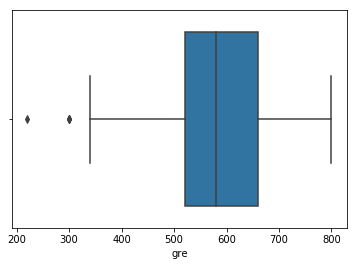

In [7]:
sns.boxplot(data["gre"])


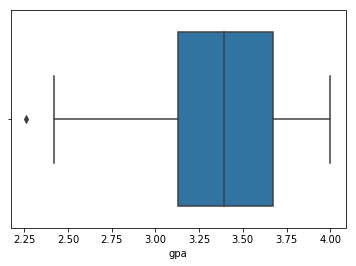

In [8]:
sns.boxplot(data["gpa"])

## Plot Data

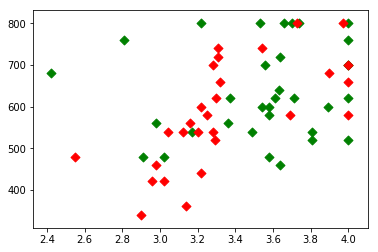

In [9]:
plt.scatter(x = "gpa", y ="gre", data =data[(data.admit ==1) & (data["rank"] ==1)],color = 'green',marker = 'D',s =40)
plt.scatter(x = "gpa", y ="gre", data =data[(data.admit ==0) & (data["rank"] ==1)],color = 'red',marker = 'D',s =40)


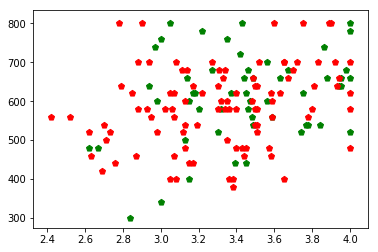

In [10]:


plt.scatter(x = "gpa", y ="gre", data =data[(data.admit ==1) & (data["rank"] ==2)],color = 'green',marker = 'p',s =40)
plt.scatter(x = "gpa", y ="gre", data =data[(data.admit ==0) & (data["rank"] ==2)],color = 'red',marker = 'p',s =40)

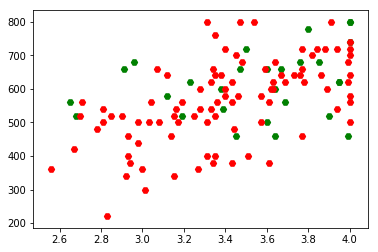

In [11]:
plt.scatter(x = "gpa", y ="gre", data =data[(data.admit ==1) & (data["rank"] ==3)],color = 'green',marker = 'H',s =40)
plt.scatter(x = "gpa", y ="gre", data =data[(data.admit ==0) & (data["rank"] ==3)],color = 'red',marker = 'H',s =40)

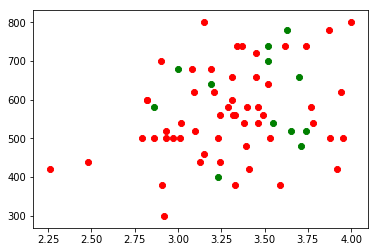

In [12]:
plt.scatter(x = "gpa", y ="gre", data =data[(data.admit ==1) & (data["rank"] ==4)],color = 'green',marker = '8',s =40)
plt.scatter(x = "gpa", y ="gre", data =data[(data.admit ==0) & (data["rank"] ==4)],color = 'red',marker = '8',s =40)

## DataPreprocessing

Here we will do  below steps:
  1. seperate features and label :
  2. one-hot encoing to convert categorical records to different columns 
  3. min-max normalizer to normalize gre and gpa4
  4. split data into test and training sets

In [13]:
features= data[["gre","gpa","rank"]]
display(features.head())
label = data["admit"]
display(label.head())

,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4


0    0
1    1
2    1
3    1
4    0
Name: admit, dtype: int64

In [14]:
#one-hot-encoding
encoded_rank = pd.get_dummies(features["rank"])
features_final= pd.concat([features[["gre","gpa"]], encoded_rank] , axis=1)
display(features_final.head())

,gre,gpa,1,2,3,4
0,380,3.61,0,0,1,0
1,660,3.67,0,0,1,0
2,800,4.00,1,0,0,0
3,640,3.19,0,0,0,1
4,520,2.93,0,0,0,1


In [15]:
# minmax scaler
scaler = MinMaxScaler() 
numericCol = ["gre","gpa"]
features_final[numericCol] = scaler.fit_transform(features_final[numericCol] )
display(features_final.head())

,gre,gpa,1,2,3,4
0,0.275862,0.775862,0,0,1,0
1,0.758621,0.810345,0,0,1,0
2,1.000000,1.000000,1,0,0,0
3,0.724138,0.534483,0,0,0,1
4,0.517241,0.385057,0,0,0,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    label, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
display(X_train.head())
display(y_train.head())

display(X_test.head())
display(y_test.head())

,gre,gpa,1,2,3,4
336,0.517241,0.511494,0,0,1,0
64,0.620690,1.000000,0,0,1,0
55,0.896552,1.000000,0,0,1,0
106,0.827586,0.747126,1,0,0,0
300,0.724138,0.597701,0,1,0,0


336    0
64     0
55     1
106    1
300    0
Name: admit, dtype: int64

,gre,gpa,1,2,3,4
132,0.620690,0.655172,0,1,0,0
309,0.379310,0.413793,0,0,1,0
341,0.586207,0.224138,0,0,1,0
196,0.758621,0.465517,0,0,1,0
246,0.793103,0.620690,0,1,0,0


132    0
309    0
341    1
196    0
246    0
Name: admit, dtype: int64

## Modeling 
Below are some of the parameters used for NN in keras.

### Dense :

###### Units:
    number of nodes
    
###### Input_dim  and input_shape : 
    These are input data size. input_dim will accept a integer and input_shape a tuple.
######  activation : 
    Differnt activations are below : https://en.wikipedia.org/wiki/Activation_function/ & https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6/
- relu
- sigmoid
- tanh
- softmax
- elu (Exponential Linear Unit)
- selu(Scaled Exponential Linear Unit)
- softplus
- softsign
- hard_sigmoid
- linear

### Dropout :
  It inticates the percentage of nodes that should be switched of during each eppoch.

### Compile :

###### Loss:
Its is the error function based on the weights are updated. Here we can use Keras loss functions or TensorFlow/Theano symbolic function.

- binary_crossentropy
- categorical_crossentropy
- mean_squared_error
- mean_absolute_error

###### optimizer :
- SGD
- Nesterov
- Adam
- RMSprop
- Adagrad
- AdaDelta

Here we will use keras sequential model:

In [30]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

model = Sequential()
#model.add(Dense(128, activation='relu', input_shape=(6,)))
#model.add(Dense(128, activation='relu',input_dim = 6))
#model.add(Dropout(.2))
model.add(Dense(units = 100, activation='relu',input_dim = 6))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss = 'binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
model.summary()

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=50, verbose=0)

# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 100)               700       
_________________________________________________________________
dropout_20 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 101       
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________
320/320 [==============================] - 0s 896us/step

 Training Accuracy: 0.703125
80/80 [==============================] - 0s 143us/step

 Testing Accuracy: 0.7


#### Categorical

In [28]:
from keras.utils.np_utils import to_categorical
y_train1 =  np.array(to_categorical(y_train))
print(y_train1[:10])
X_train1 =  np.array(X_train)
print(X_train1[:10])

y_test1 =  np.array(to_categorical(y_test))
print(y_test1[:10])
X_test1 =  np.array(X_test)
print(X_test1[:10])

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[[0.51724138 0.51149425 0.         0.         1.         0.        ]
 [0.62068966 1.         0.         0.         1.         0.        ]
 [0.89655172 1.         0.         0.         1.         0.        ]
 [0.82758621 0.74712644 1.         0.         0.         0.        ]
 [0.72413793 0.59770115 0.         1.         0.         0.        ]
 [0.86206897 0.66666667 0.         1.         0.         0.        ]
 [0.51724138 0.33908046 0.         0.         1.         0.        ]
 [0.68965517 0.63793103 1.         0.         0.         0.        ]
 [0.68965517 1.         0.         1.         0.         0.        ]
 [0.79310345 0.94252874 1.         0.         0.         0.        ]]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
[[0.62068966 0.65517241 0.         1.         0.         0.        ]
 [0.37931034 0.4137931  0.         0.         1.         0

In [33]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(6,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation='sigmoid'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Training the model
model.fit(X_train1, y_train1, epochs=200, batch_size=100, verbose=0)

# Evaluating the model on the training and testing set
score = model.evaluate(X_train1, y_train1)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test1, y_test1)
print("\n Testing Accuracy:", score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 128)               896       
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 130       
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________
320/320 [==============================] - 0s 494us/step

 Training Accuracy: 0.725
80/80 [==============================] - 0s 82us/step

 